In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data_dir = '~/data/twconv/twconv_2016_usersec'
data_dir = os.path.expanduser(data_dir)

In [3]:
fpath = os.path.join(data_dir,  'conversations.csv')
ds = pd.read_csv(fpath, dtype=object)
ds.shape

(42114, 14)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42114 entries, 0 to 42113
Data columns (total 14 columns):
id                       42114 non-null object
screen_name              42114 non-null object
latitude                 67 non-null object
longitude                67 non-null object
lang                     42114 non-null object
in_reply_to_status_id    40575 non-null object
created_at               42114 non-null object
text                     42114 non-null object
timestamp                42112 non-null object
conversation_id          42114 non-null object
conversation_deep        42114 non-null object
num_replies              42114 non-null object
num_users                42114 non-null object
url                      42114 non-null object
dtypes: object(14)
memory usage: 4.5+ MB


# type of conversations

In [5]:
ds.groupby('conversation_id').size().sort_values(ascending=False).head()

conversation_id
702007859199012864    199
696879362973503488    199
683330389616791552    198
704044387622371328    197
716373274033332224    196
dtype: int64

In [6]:
sampleconv=ds[ds.conversation_id=='702007859199012864']
sampleconv.shape

(199, 14)

In [7]:
import networkx as nx

In [58]:
G = nx.DiGraph()
for ix, row in sampleconv.iterrows():
    target = row['id']
    source = row['in_reply_to_status_id']
    deep = int(row['conversation_deep'])
    
    if pd.isnull(source):
        G.add_node(target, r=10, group =1)
        print(target, G.nodes[target])
        continue
        
    if deep > 2:
        deep=3
        

    if target not in G.nodes:
        G.add_node(target, r=5, group=deep)        
    if source not in G.nodes:
        G.add_node(source, r=5, group=deep)
    G.add_edge(source, target)

702007859199012864 {'r': 10, 'group': 1}


In [60]:
# nodes = [{'id': k, 'group':1} for k,v in nodes.items()]
# links.append({'source':source, 'target':target, 'value':1})

rep = {'nodes': nodes, 'links': links}

nodes = [{'id': k, 'group': att['group'], 'r':att['r']} for k,att in G.nodes(data=True)]
links = []
for source, target in  G.edges:
    links.append({'source':source, 'target':target, 'value':1})
    
rep = {'nodes': nodes, 'links': links}

#rep

In [61]:
import json
with open('conversationstypes.json', 'w') as f:
    json.dump(rep, f)

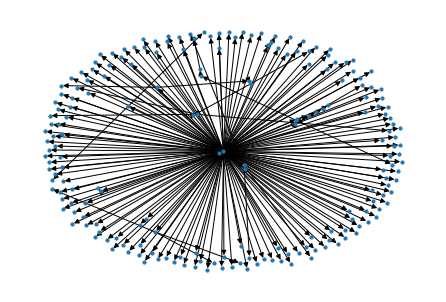

In [34]:
#pos = nx.spring_layout(G,k=1.0 )  #so^>v<dph8 ,k=0.10,iterations=50
#nx.draw(G, pos=pos, s=1)
nx.draw_spring(G,node_size=10, with_labels=False, fixed=['702007859199012864'],k=5)

# sample conversation

In [6]:
ds[ds.text.str.contains('life straw')].values

array([[723235984662511616, 'KarlaMoralesR', nan, nan, nan,
        'Algún courrier que nos apoye? https://t.co/YRDCqRW2zh',
        '2016-04-21 19:44:30', 723235984662511616, 1, 41, 29,
        'https://www.twitter.com/KarlaMoralesR/status/723235984662511616']],
      dtype=object)

**mention from KarlaMoralesR to ArianaCevallos but it's not in the dataset**

https://twitter.com/ariannacevallos/status/723234766653415425

In [25]:
ds[ds.screen_name.str.lower()=='JAGhedini'.lower()]

,id,screen_name,latitude,longitude,in_reply_to_status_id,text,timestamp,conversation_id,conversation_deep,num_replies,num_users,url


In [11]:
path = '/Users/johnny/data/crisis/emerging_leaders/timelines_raw.csv'

In [13]:
profiles = pd.read_csv(path, usecols=['screen_name','description'])
profiles.shape

(14860509, 2)

In [17]:
profiles.drop_duplicates('screen_name', inplace=True)
profiles.fillna('', inplace=True)

In [18]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120220 entries, 0 to 14860360
Data columns (total 2 columns):
screen_name    120220 non-null object
description    120220 non-null object
dtypes: object(2)
memory usage: 2.8+ MB


In [20]:
profiles[profiles.description.str.contains('good story')]

,screen_name,description


In [23]:
profiles[profiles.screen_name.str.lower()=='JAGhedini'.lower()]

,screen_name,description


In [40]:
profiles[profiles.screen_name=='daniellimb'].values

array([['daniellimb',
        'mom of twins+one, designer, advertiser, photographer,dancer, driven and life lover. Love @artsenal']],
      dtype=object)

In [41]:
profiles[profiles.screen_name=='Sandinin'].values

array([['Sandinin',
        'abogado, humanista, sigo creyendo en el ser humano!!!']],
      dtype=object)

In [43]:
path = '/Users/johnny/data/crisis/emerging_leaders/timelines.csv'

In [44]:
profiles = pd.read_csv(path)
profiles.shape

(120219, 2)

In [48]:
profiles[profiles.screen_name=='juanjogldu'].values

array([['juanjogldu',
        "MENTION ltc ? MENTION ... MENTION great news my friend . cheers for that ! MENTION quien pidio sanduches ? MENTION HASHTAG ? MENTION que grande ! MENTION todos tiene rabo de paja , toditos estan embarrados hasta las patas MENTION ltc ? MENTION you'll be ok and beat it ! MENTION clasico ? clasico es que no ganen en casa blanca . para ldu no es clasico ."]],
      dtype=object)

In [46]:
profiles[profiles.screen_name=='Sandinin'].values

array([['Sandinin',
        'dios ! directo a la mierda nos estamos yendo en todos los aspectos ! quien denuncia es enjuiciado , mas alla de las personas esto es una estupidez , a baca lo censuran por haber denuncia ... tal cual ! que verguenza ! ahora retiran la firma via oficio ! MENTION de verguenza en verguenza ! pobre mi pais ! HASHTAG el " recaderito " es una verguenza ! mientras echando espuma clama que deben " recuperar " la fiscalia ! quieren la fiscalia ! asi de sencillo ! y el plazo ? y guacho ? te lo jurito !']],
      dtype=object)